In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

UsageError: Line magic function `%` not found.


In [2]:
# read in the json files
portfolio = pd.read_json('../input/portfolio.json', orient='records', lines=True)
profile = pd.read_json('../input/profile.json', orient='records', lines=True)
transcript = pd.read_json('../input/transcript.json', orient='records', lines=True)

In [3]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
portfolio = portfolio.rename(columns={'id': 'offer_id', 
                                      'difficulty': 'required_spend',
                                     })

In [5]:
dummies = pd.get_dummies(portfolio['channels'].apply(pd.Series).stack(), prefix='channel').sum(level=0)
portfolio = portfolio.merge(dummies, left_index=True, right_index=True)
portfolio = portfolio.drop('channels', axis=1)

In [6]:
portfolio['offer_name'] = portfolio['offer_type'] + '-' + portfolio['required_spend'].astype(str) + 'spend-' + + portfolio['reward'].astype(str) + 'reward-' + portfolio['duration'].astype(str) + 'days' 

In [7]:
portfolio

,reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_name
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,bogo-10spend-10reward-7days
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,bogo-10spend-10reward-5days
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,informational-0spend-0reward-4days
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,bogo-5spend-5reward-7days
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,discount-20spend-5reward-10days
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,discount-7spend-3reward-7days
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,discount-10spend-2reward-10days
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,informational-0spend-0reward-3days
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,bogo-5spend-5reward-5days
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,discount-10spend-2reward-7days


In [8]:
portfolio.duplicated().sum()

0

In [9]:
profile.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile['became_member_year'] = pd.DatetimeIndex(profile['became_member_on']).year
profile['became_member_month'] = pd.DatetimeIndex(profile['became_member_on']).month

In [11]:
profile['membership_duration'] = (profile['became_member_on'].max() - profile['became_member_on'])

In [12]:
profile.head(5)

,gender,age,id,became_member_on,income,became_member_year,became_member_month,membership_duration
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,2017,2,529 days
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,376 days
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,2018,7,14 days
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,443 days
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,2017,8,356 days


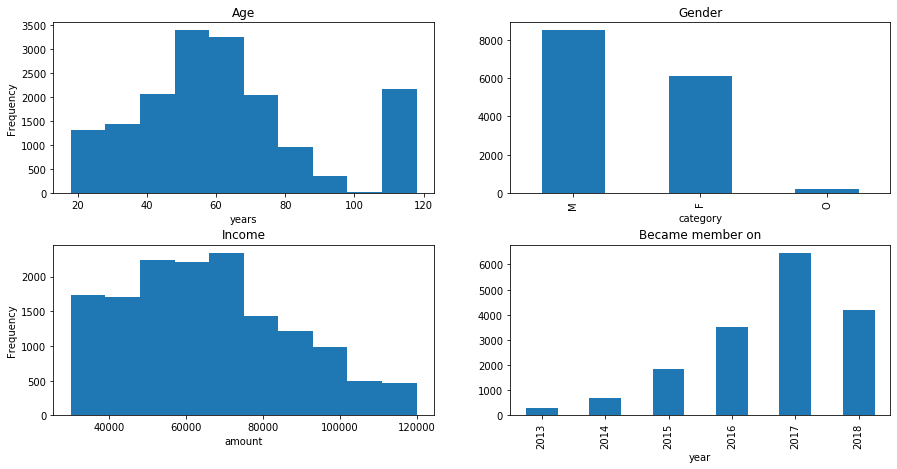

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))

profile['age'].plot(kind='hist', ax=axes[0, 0], title='Age').set_xlabel('years')
profile['gender'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Gender').set_xlabel('category')
profile['income'].plot(kind='hist', ax=axes[1, 0], title='Income').set_xlabel('amount')
profile['became_member_year'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], title='Became member on').set_xlabel('year')

plt.subplots_adjust(hspace = 0.3, bottom=0.1)
plt.show()

In [14]:
profile['age'] = profile['age'].replace(118, np.nan)

In [15]:
# Dropping O to maintain the balance in the dataset for further prediction
profile['gender'] = profile[profile['gender'] !='O']

In [16]:
profile['gender'].value_counts()

M    8484
F    6129
Name: gender, dtype: int64

In [17]:
profile['gender'] = profile['gender'].map({'M': 0, 'F': 1})

In [18]:
profile['gender'].value_counts()

0.0    8484
1.0    6129
Name: gender, dtype: int64

In [19]:
profile.duplicated().sum()

0

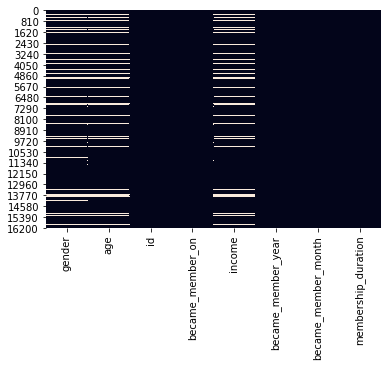

In [20]:
sns.heatmap(profile.isnull(), cbar=False)

In [21]:
profile = profile.drop(profile[profile['gender'].isnull()].index)

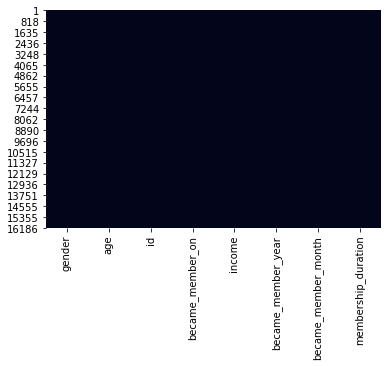

In [22]:
sns.heatmap(profile.isnull(), cbar=False)

In [23]:
profile.shape

(14613, 8)

In [24]:
# grouping ages into groups to combine them into categories
# binning of age -> transform into descrete groups
bins = [10, 20, 30, 40, 50, 60, 70, 80, 120]
group_names = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
profile['age_categories'] = pd.cut(profile['age'], bins, labels=group_names)

In [25]:
bins = [20000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000]
labels = ['20k-39k', '40k-49k', '50k-59k', '60k-69k', '70k-79k', '80k-89k', '90k-99k', '100k-109k', '110k-120k']
profile['income_binned'] = pd.cut(profile['income'], bins=bins, labels=labels)

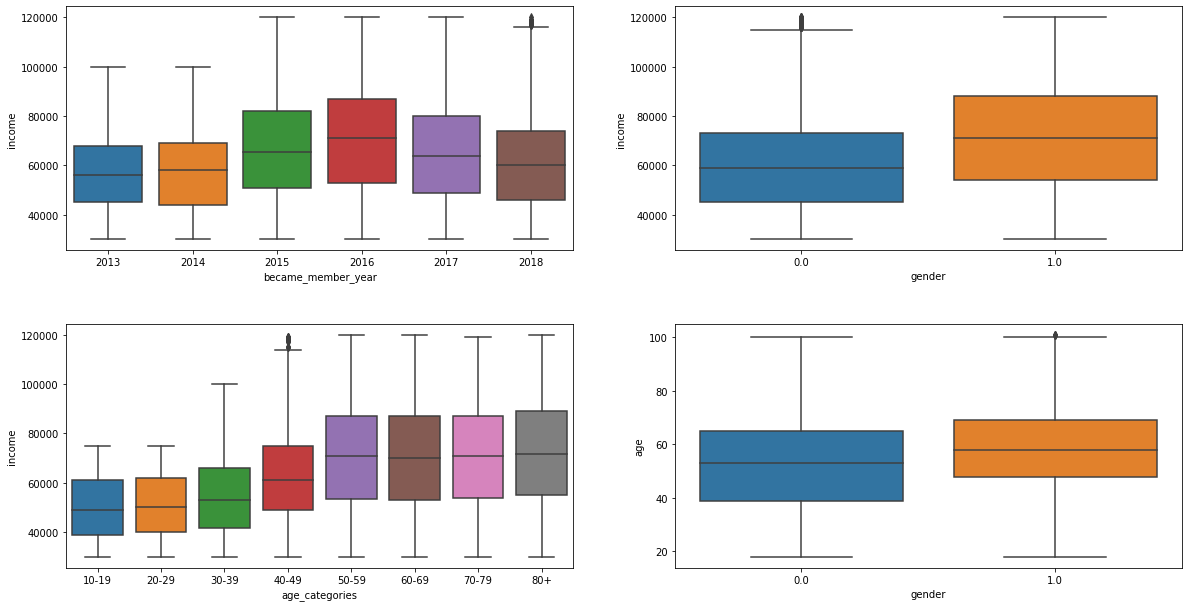

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.boxplot(data=profile, x='became_member_year', y='income', ax=axes[0, 0])
sns.boxplot(data=profile, x='gender', y='income', ax=axes[0, 1])
sns.boxplot(data=profile, x='age_categories', y='income', ax=axes[1, 0])
sns.boxplot(data=profile, x='gender', y='age', ax=axes[1, 1])
plt.subplots_adjust(hspace = 0.3, bottom=0.1)

In [27]:
profile = profile.rename(columns={'id': 'customer_id'})

In [28]:
transcript.head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [29]:
# getting the values out of a dict object
# combining both offer id and offer_id into a single column
values_df = pd.DataFrame(transcript['value'].tolist())
values_df['offerid'] = values_df['offer id'].combine_first(values_df['offer_id'])
values_df.drop(['offer id', 'offer_id'], axis=1, inplace=True)
index_df = pd.DataFrame({'idx': transcript.index.values.tolist()})
combined = index_df.merge(values_df, left_index=True, right_index=True)
combined_index = combined.set_index('idx')
transcript = transcript.merge(combined_index, left_index=True, right_index=True)

In [30]:
transcript.head(5)

,person,event,value,time,amount,reward,offerid
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0


In [31]:
transcript = transcript.merge(portfolio, left_on='offerid', right_on='offer_id', how='left')

In [32]:
transcript = transcript.rename(columns={'reward_x': 'paid_reward', 
                                        'reward_y': 'planned_reward', 
                                       })

In [33]:
transcript = transcript.rename(columns={'person': 'customer_id'})

In [34]:
transcript['time'] = transcript['time'] / 24

In [35]:
transcript = transcript.drop(columns=['value'])

In [36]:
print(transcript.duplicated().sum())

397


In [37]:
transcript = transcript.drop_duplicates().reset_index(drop=True)

In [38]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33182
Name: event, dtype: int64

In [39]:
transaction_df = transcript[transcript['event'] == 'transaction'].copy()
transaction_df = transaction_df[['customer_id', 'time', 'amount']]
transaction_df.head(5)

,customer_id,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.0,34.56
12659,54890f68699049c2a04d415abc25e717,0.0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,0.0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,0.0,18.97


In [40]:
offer_df = transcript[transcript['event'] != 'transaction'].copy()
offer_df = pd.get_dummies(offer_df, columns=['event'], prefix=None)
offer_df = offer_df.drop(columns=['amount', 'offerid', 'paid_reward'], axis=1)

In [41]:
offer_df = offer_df.rename(columns={'event_offer completed': 'event_offer_completed',
                                   'event_offer received': 'event_offer_received',
                                    'event_offer viewed': 'event_offer_viewed'
                                   })

In [42]:
offer_df.head(5)

,customer_id,time,planned_reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_name,event_offer_completed,event_offer_received,event_offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0,bogo-5spend-5reward-7days,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,0.0,5.0,20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,0.0,0.0,1.0,discount-20spend-5reward-10days,0,1,0
2,e2127556f4f64592b11af22de27a7932,0.0,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,1.0,discount-10spend-2reward-7days,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,2.0,10.0,10.0,discount,fafdcd668e3743c1bb461111dcafc2a4,1.0,1.0,1.0,1.0,discount-10spend-2reward-10days,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,0.0,10.0,10.0,5.0,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,1.0,1.0,1.0,bogo-10spend-10reward-5days,0,1,0


In [43]:
count_events = transcript['event'].value_counts()
total_events = count_events.sum()
percentage_transactions = count_events[0] / total_events * 100
percentage_offers = count_events[1:].sum() / total_events * 100

percentage_transactions, percentage_offers, count_events

(45.38915583545929, 54.610844164540715, transaction        138953
 offer received      76277
 offer viewed        57725
 offer completed     33182
 Name: event, dtype: int64)

In [44]:
print(portfolio.columns.to_list())
portfolio.head(1)

['reward', 'required_spend', 'duration', 'offer_type', 'offer_id', 'channel_email', 'channel_mobile', 'channel_social', 'channel_web', 'offer_name']


,reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_name
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,bogo-10spend-10reward-7days


In [45]:
print(transaction_df.columns.to_list())
transaction_df.head(1)

['customer_id', 'time', 'amount']


,customer_id,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.0,0.83


In [46]:
print(offer_df.columns.to_list())
offer_df.head(1)

['customer_id', 'time', 'planned_reward', 'required_spend', 'duration', 'offer_type', 'offer_id', 'channel_email', 'channel_mobile', 'channel_social', 'channel_web', 'offer_name', 'event_offer_completed', 'event_offer_received', 'event_offer_viewed']


,customer_id,time,planned_reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_name,event_offer_completed,event_offer_received,event_offer_viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0,bogo-5spend-5reward-7days,0,1,0


In [96]:
print(profile.columns.to_list())
profile.head(1)

['gender', 'age', 'customer_id', 'became_member_on', 'income', 'became_member_year', 'became_member_month', 'membership_duration', 'age_categories', 'income_binned']


,gender,age,customer_id,became_member_on,income,became_member_year,became_member_month,membership_duration,age_categories,income_binned
1,1.0,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,376 days,50-59,110k-120k


In [111]:
#get the list of customerIds from offer df
customer_ids = offer_df['customer_id'].unique()
print(customer_ids)

['78afa995795e4d85b5d9ceeca43f5fef' 'a03223e636434f42ac4c3df47e8bac43'
 'e2127556f4f64592b11af22de27a7932' ... 'd825b707198046e39baa4fdcfa11d621'
 'c207a8a8ef5c47ee970ca45f859e07eb' '9a3f45cf29ef428b932492c7a5d6ac52']


In [112]:
# adding offer end date to see if the offer completed is in range
offer_df['offer_ends'] = offer_df['time'] + offer_df['duration']

In [113]:
def filter_by_cid(df, cid):
    return df[df['customer_id'] == cid]

In [114]:
def get_received(df):
    return df[df['event_offer_received'] == 1]

def get_viewed(df):
    return df[df['event_offer_viewed'] == 1]

def get_completed(df):
    return df[df['event_offer_completed'] == 1]

In [367]:
# a03223e636434f42ac4c3df47e8bac43
# '78afa995795e4d85b5d9ceeca43f5fef'
cid_78_offers = filter_by_cid(offer_df, '78afa995795e4d85b5d9ceeca43f5fef')
cid_78_transactions = filter_by_cid(transaction_df, '78afa995795e4d85b5d9ceeca43f5fef')

In [368]:
received_offers = get_received(cid_78_offers)
viewed_offers = get_viewed(cid_78_offers)
completed_offers = get_completed(cid_78_offers)
completed_offers

,customer_id,time,planned_reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,channel_web,offer_name,event_offer_completed,event_offer_received,event_offer_viewed,offer_ends
47583,78afa995795e4d85b5d9ceeca43f5fef,5.50,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0,bogo-5spend-5reward-7days,1,0,0,12.50
218231,78afa995795e4d85b5d9ceeca43f5fef,21.25,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1.0,1.0,1.0,0.0,bogo-10spend-10reward-7days,1,0,0,28.25
218232,78afa995795e4d85b5d9ceeca43f5fef,21.25,5.0,5.0,5.0,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0,1.0,1.0,bogo-5spend-5reward-5days,1,0,0,26.25


In [377]:
def completed_lookup(row, completed_offers):
    row_len = row.shape[0]
    if row_len > 0:
        offers = completed_offers.loc[completed_offers['offer_id'] == row['offer_id'], :]
        time = offers.loc[offers['time'] >= row['time'], 'time']
        val = time.values
        if len(val) == 0:
            return -1
        else:
            return val[0]

In [376]:
def viewed_lookup(idx, row, viewed_offers):
    row_len = row.shape[0]
    if row_len > 0:
        offers = viewed_offers.loc[viewed_offers['offer_id'] == row['offer_id'], :]
        time = offers.loc[offers['time'] >= row['time'], 'time']
        val = time.values
        if len(val) == 0:
            return -1
        else:
            return val[0]

In [375]:
def transaction_lookup(row, transactions_df):
    start = row['time']
    end = row['offer_ends']
    cid = row['customer_id']
    condition = (transactions_df['customer_id'] == cid)
    time = transactions_df.loc[condition, 'time'].between(start, end)
    amount = transactions_df.loc[time, 'amount'].sum()
    return amount

In [378]:
def calc_offers(cid):
    offers = filter_by_cid(offer_df, cid)
    transactions = filter_by_cid(transaction_df, cid)
    received_offers = get_received(offers)
    viewed_offers = get_viewed(offers)
    completed_offers = get_completed(offers)
    transactions = filter_by_cid(transaction_df, cid)
    received_offers.loc[:, 'completed_at'] = received_offers.apply(lambda row: completed_lookup(row, completed_offers), axis=1)
    received_offers.loc[:, 'viewed_at'] = received_offers.apply(lambda row: viewed_lookup(row.name, row, viewed_offers), axis=1)
    received_offers.loc[:, 'offer_success'] = (received_offers['offer_ends'] > received_offers['completed_at']) & (received_offers['viewed_at'] <= received_offers['completed_at']) & (received_offers['completed_at'] != -1) & (received_offers['viewed_at'] != -1)
    received_offers.loc[:, 'offer_success_no_view'] = (received_offers['completed_at'] > 0) & ((received_offers['viewed_at'] == -1) | (received_offers['viewed_at'] > received_offers['completed_at']))
    received_offers.loc[:, 'amount'] = received_offers.apply(lambda row: transaction_lookup(row, transactions), axis=1)
    received_offers.loc[:, 'offer_success'] = received_offers['offer_success'].map({True: 1, False: 0})
    received_offers.loc[:, 'offer_success_no_view'] = received_offers['offer_success_no_view'].map({True: 1, False: 0})
    return received_offers

In [379]:
vfunc = np.vectorize(calc_offers)
calculated_offer_df = pd.concat(vfunc(customer_ids))

In [384]:
calculated_offer_df.head(5)

,customer_id,time,planned_reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,...,offer_name,event_offer_completed,event_offer_received,event_offer_viewed,offer_ends,completed_at,viewed_at,offer_success,offer_success_no_view,amount
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,...,bogo-5spend-5reward-7days,0,1,0,7.0,5.50,0.25,1,0,37.67
53176,78afa995795e4d85b5d9ceeca43f5fef,7.0,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,...,informational-0spend-0reward-3days,0,1,0,10.0,-1.00,9.00,0,0,49.39
150575,78afa995795e4d85b5d9ceeca43f5fef,17.0,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1.0,1.0,1.0,...,bogo-10spend-10reward-7days,0,1,0,24.0,21.25,17.00,1,0,48.28
201427,78afa995795e4d85b5d9ceeca43f5fef,21.0,5.0,5.0,5.0,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0,1.0,...,bogo-5spend-5reward-5days,0,1,0,26.0,21.25,24.25,0,1,48.28
1,a03223e636434f42ac4c3df47e8bac43,0.0,5.0,20.0,10.0,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,0.0,0.0,...,discount-20spend-5reward-10days,0,1,0,10.0,-1.00,0.25,0,0,1.09


In [392]:
calculated_offer_df.shape

(76277, 21)

In [394]:
offer_df[offer_df['event_offer_received'] == 1].shape

(76277, 16)

In [389]:
#calculated_offer_df.to_csv('../input/offers.csv', index=False)

In [390]:
df = pd.read_csv('../input/offers.csv')

In [391]:
df.shape

(76277, 21)

In [395]:
profile.head(5)

,gender,age,customer_id,became_member_on,income,became_member_year,became_member_month,membership_duration,age_categories,income_binned
1,1.0,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,376 days,50-59,110k-120k
3,1.0,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,443 days,70-79,90k-99k
5,0.0,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4,91 days,60-69,60k-69k
8,0.0,65.0,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2,167 days,60-69,50k-59k
12,0.0,58.0,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11,257 days,50-59,50k-59k


In [399]:
df = df.merge(profile, left_on='customer_id', right_on='customer_id', how='inner')

In [397]:
df.shape

(65585, 30)

In [400]:
dfn.head(5)

,customer_id,time,planned_reward,required_spend,duration,offer_type,offer_id,channel_email,channel_mobile,channel_social,...,amount,gender,age,became_member_on,income,became_member_year,became_member_month,membership_duration,age_categories,income_binned
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,5.0,5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,...,37.67,1.0,75.0,2017-05-09,100000.0,2017,5,443 days,70-79,90k-99k
1,78afa995795e4d85b5d9ceeca43f5fef,7.0,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,1.0,...,49.39,1.0,75.0,2017-05-09,100000.0,2017,5,443 days,70-79,90k-99k
2,78afa995795e4d85b5d9ceeca43f5fef,17.0,10.0,10.0,7.0,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1.0,1.0,1.0,...,48.28,1.0,75.0,2017-05-09,100000.0,2017,5,443 days,70-79,90k-99k
3,78afa995795e4d85b5d9ceeca43f5fef,21.0,5.0,5.0,5.0,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0,1.0,...,48.28,1.0,75.0,2017-05-09,100000.0,2017,5,443 days,70-79,90k-99k
4,e2127556f4f64592b11af22de27a7932,0.0,2.0,10.0,7.0,discount,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,0.0,...,0.00,0.0,68.0,2018-04-26,70000.0,2018,4,91 days,60-69,60k-69k


In [401]:
df.columns

Index(['customer_id', 'time', 'planned_reward', 'required_spend', 'duration',
       'offer_type', 'offer_id', 'channel_email', 'channel_mobile',
       'channel_social', 'channel_web', 'offer_name', 'event_offer_completed',
       'event_offer_received', 'event_offer_viewed', 'offer_ends',
       'completed_at', 'viewed_at', 'offer_success', 'offer_success_no_view',
       'amount', 'gender', 'age', 'became_member_on', 'income',
       'became_member_year', 'became_member_month', 'membership_duration',
       'age_categories', 'income_binned'],
      dtype='object')

In [465]:
offers_by_name = pd.DataFrame(df.groupby(['offer_name', 'offer_success']).count()['offer_type'])

In [513]:
best_offers = offers_by_name.groupby(level=0).transform(lambda x: x[1] / x.sum() if len(x) == 2 else 0).unstack(level=0).iloc[0, 0:-2]
best_offers = pd.DataFrame(best_offers).reset_index().loc[:, ['offer_name', 0]].rename({0: 'percentage'}, axis=1)

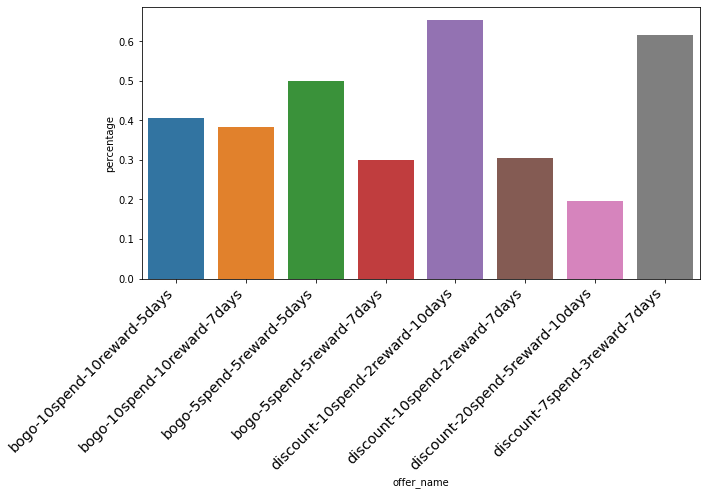

In [520]:
plt.figure(figsize=(10, 5))
offer_chart = sns.barplot(data=best_offers, x='offer_name', y='percentage')
offer_chart.set_xticklabels(
    offer_chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.show()